# LAb4: Modelos polinomiais

<hr style="border:1px  solid black"> </hr>

### (Preencher)
## Nome: 
## Número: 

<hr style="border:1px  solid black"> </hr>

## Desenvolva e corra o código pedido nas células imediatamente abaixo das perguntas.

# IMPORTANTE:
## Uma vez completado, grave este Jupyter notebook com o seguinte nome:
## Axxxxx-Lab4.ipynb (Axxxxx: número de aluno)
##  e depois submeta o ficheiro no link do Moodle providenciado para o efeito.

<hr style="border:2px solid black"> </hr>

# Pergunta 1 - Discriminantes polinomiais:
### Considere o ficheiro pickle $\texttt{Lab4-T51D-P1.p}$ onde se encontra um dicionário de Python com as seguintes variáveis:
* #### "data":       dados bi-dimensionais (4000 amostras)
* #### "target":     classe dos dados (inteiros de 0 a 3)
* #### "foldTrain":  array boleano indicando os dados a serem usados para treinar os classificadores
* #### "foldTest":   array boleano indicando os dados a serem usados para testar os classificadores
## a) Use os dados de treino para estimar discriminante polinomial de 4ª ordem.
## b) Calcule as matrizes de confusão e o número total de erros nos dados de treino e de teste. Imprima os resultados.
## c) Faça um "plot" dos dados de teste por classe, e dos erros do discriminante polinomial.
## d) Explique brevemente porque é que mais de metade dos pontos da classe "1" não são bem classificados 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import confusion_matrix
D=pickle.load(open('Lab4-T51D-P1.p','rb'))
print(D.keys())

dict_keys(['data', 'target', 'foldTrain', 'foldTest'])


## 1.a)

In [7]:
from sklearn.preprocessing import PolynomialFeatures
X=D['data']
y=D['target']
f1=D['foldTrain']
f2=D['foldTest']
X1=X[:,f1]
y1=y[f1]
X2=X[:,f2]
y2=y[f2]
Y1=-np.ones((4,y1.shape[0]))
for i in range(4):
    Y1[i,y1==i]=1
poly=PolynomialFeatures(degree=4).fit(X1.T)
X1b=poly.transform(X1.T).T
X2b=poly.transform(X2.T).T
Rx=np.dot(X1b,X1b.T)
rxy=np.dot(X1b,Y1.T)
W=np.dot(np.linalg.pinv(Rx),rxy)

## 1.b)

In [12]:
y1e=np.argmax(np.dot(W.T,X1b),axis=0)
print('Nº erros no treino:',np.sum(y1!=y1e))
print(confusion_matrix(y1,y1e))

y2e=np.argmax(np.dot(W.T,X2b),axis=0)
print('\nNº erros no teste:',np.sum(y2!=y2e))
print(confusion_matrix(y2,y2e))

Nº erros no treino: 42
[[ 62  15   0  23]
 [  0  96   4   0]
 [  0   0 100   0]
 [  0   0   0 100]]

Nº erros no teste: 845
[[583 130   0 187]
 [400 372 128   0]
 [  0   0 900   0]
 [  0   0   0 900]]


## 1.c)

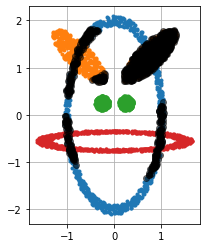

In [11]:
plt.plot(X2[0,y2==0],X2[1,y2==0],'.')
plt.plot(X2[0,y2==1],X2[1,y2==1],'.')
plt.plot(X2[0,y2==2],X2[1,y2==2],'.')
plt.plot(X2[0,y2==3],X2[1,y2==3],'.')
plt.plot(X2[0,y2!=y2e],X2[1,y2!=y2e],'ok',alpha=.5)
plt.axis('scaled')
plt.grid(True)

## 1.d)

### O treino não contém a nuvem esquerda de pontos desta classe

<hr style="border:2px solid black"> </hr>

# Pergunta 2 - Regressão polinomial:
### Considere o ficheiro pickle $\texttt{Lab4-T51D-P2.p}$ onde se encontra um dicionário de Python com as seguintes variáveis:
* #### "x":       dados uni-dimensionais/variável independente (500 pontos)
* #### "y":       variável dependente/saídas desejadas (500 pontos)
* #### "foldTrain":  array boleano indicando os dados a serem usados para treinar os classificadores
* #### "foldTest":   array boleano indicando os dados a serem usados para testar os classificadores

## a) Use os dados de treino para estimar um regressor polinomial de 5ª ordem. Imprima os valores dos pesos.
## b) Calcule o coeficiente de determinação ($\bf R^2$) para os dados de treino e para os dados de teste.
## c) Faça um "plot" do polinómio estimado. Visualize o polinómio conjutamente com os dados de teste. 
## d)  Explique brevemente porque é que o modelo não está bem adaptado aos dados de teste.

In [14]:
D=pickle.load(open('Lab4-T51D-P2.p','rb'))
D.keys()

dict_keys(['x', 'y', 'foldTrain', 'foldTest'])

## 2.a)

In [40]:
from sklearn.preprocessing import PolynomialFeatures
x=D.x
y=D.y
f1=D.foldTrain
f2=D.foldTest
x1=x[f1]
y1=y[f1]
x2=x[f2]
y2=y[f2]

#adicionar 2ª dimensão
X1=x1[:,np.newaxis]
X2=x2[:,np.newaxis]
poly=PolynomialFeatures(degree=5).fit(X1)
X1b=poly.transform(X1).T
X2b=poly.transform(X2).T

Rx=np.dot(X1b,X1b.T)
rxy=np.dot(X1b,y1.T)
W=np.dot(np.linalg.pinv(Rx),rxy)
print(W)

# com funções do sklearn
from sklearn.linear_model import LinearRegression
lr=LinearRegression().fit(X1b.T,y1)
print(lr.coef_)
print(lr.intercept_)

[ 3.01920675  2.42982275  0.19422044 -0.29890342 -0.02875485  0.00515094]
[ 0.          2.42982275  0.19422044 -0.29890342 -0.02875485  0.00515094]
3.019206748237606


## 2.b)

In [41]:
# estimar saídas para os dados de treino e teste
y1e=np.dot(W,X1b)
y2e=np.dot(W,X2b)
#R2 para o treino
SQtot=np.var(y1)
SQres=np.mean((y1-y1e)**2)
R2treino=1.-SQres/SQtot
#R2 para o teste
SQtot=np.var(y2)
SQres=np.mean((y2-y2e)**2)
R2teste=1.-SQres/SQtot
print('R2-treino:',R2treino)
print('R2-teste:',R2teste)

#com sklearn
print('\n')
print('R2-treino:',lr.score(X1b.T,y1))
print('R2-teste:',lr.score(X2b.T,y2))


R2-treino: 0.9482429591179281
R2-teste: -20.211150360163526


R2-treino: 0.9482429591179281
R2-teste: -20.21115036011147


## 2.c)

-4.984047523469415 4.9925533528796855


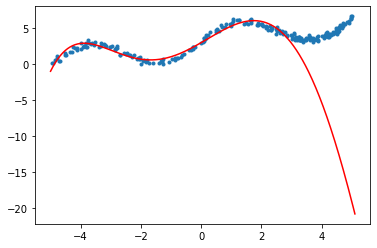

In [43]:
# ver gama dos x
print(x.min(),x.max())
t=np.linspace(-5,5.1,500)
T=poly.transform(t[:,np.newaxis]).T
yt=np.dot(W,T)
plt.plot(x2,y2,'.')
plt.plot(t,yt,'r')

## 2.d)

### Os pontos da direita (valores mais elevados de x) não pertencem aos pontos de treino